РАСЧЕТ СТРАТЕГИИ SMA И КОЭФФИЦИЕНТОВ ШАРПА

1. Загрузка данных BTCUSDT


Загрузка BTCUSDT: 100%|██████████████████████████████████████████████████████████| 106/106 [00:37<00:00,  2.82запрос/s]



2. Расчет стратегии SMA для BTCUSDT

--- Результаты стратегии BTCUSDT ---
Общая доходность стратегии: 36.70%
Годовая доходность стратегии: 36.70%
Годовая волатильность стратегии: 25.82%
Максимальная просадка стратегии: -15.91%

Общая доходность Buy & Hold: 116.97%
Годовая доходность Buy & Hold: 116.97%

3. Sharpe Ratio (risk-free = 5.0% Treasury):
   Sharpe Ratio стратегии: 1.1461

4. Sharpe Ratio (risk-free = BTC Buy & Hold 116.97%):
   Sharpe Ratio стратегии: -3.1895

5. Загрузка данных для криптовалют: BTCUSDT, SOLUSDT, ETHUSDT, ADAUSDT, BNBUSDT, XRPUSDT, DOGEUSDT

Загрузка BTCUSDT...


Загрузка BTCUSDT: 100%|██████████████████████████████████████████████████████████| 106/106 [00:36<00:00,  2.93запрос/s]


BTCUSDT: Годовая доходность = 116.97%

Загрузка SOLUSDT...


Загрузка SOLUSDT: 100%|██████████████████████████████████████████████████████████| 106/106 [00:36<00:00,  2.88запрос/s]


SOLUSDT: Годовая доходность = 82.97%

Загрузка ETHUSDT...


Загрузка ETHUSDT: 100%|██████████████████████████████████████████████████████████| 106/106 [00:38<00:00,  2.73запрос/s]


ETHUSDT: Годовая доходность = 45.54%

Загрузка ADAUSDT...


Загрузка ADAUSDT: 100%|██████████████████████████████████████████████████████████| 106/106 [00:36<00:00,  2.94запрос/s]


ADAUSDT: Годовая доходность = 41.74%

Загрузка BNBUSDT...


Загрузка BNBUSDT: 100%|██████████████████████████████████████████████████████████| 106/106 [00:37<00:00,  2.83запрос/s]


BNBUSDT: Годовая доходность = 126.42%

Загрузка XRPUSDT...


Загрузка XRPUSDT: 100%|██████████████████████████████████████████████████████████| 106/106 [00:35<00:00,  2.98запрос/s]


XRPUSDT: Годовая доходность = 228.55%

Загрузка DOGEUSDT...


Загрузка DOGEUSDT: 100%|█████████████████████████████████████████████████████████| 106/106 [00:34<00:00,  3.06запрос/s]


DOGEUSDT: Годовая доходность = 247.19%

Средняя годовая доходность криптовалют: 127.05%

6. Sharpe Ratio (risk-free = Crypto Index 127.05%):
   Sharpe Ratio стратегии: -3.5801

ИТОГОВАЯ ТАБЛИЦА SHARPE RATIOS
 Risk-Free Rate Type Risk-Free Rate  Sharpe Ratio
    US Treasury (5%)           5.0%      1.146093
      BTC Buy & Hold        116.97%     -3.189545
Crypto Index Average        127.05%     -3.580132


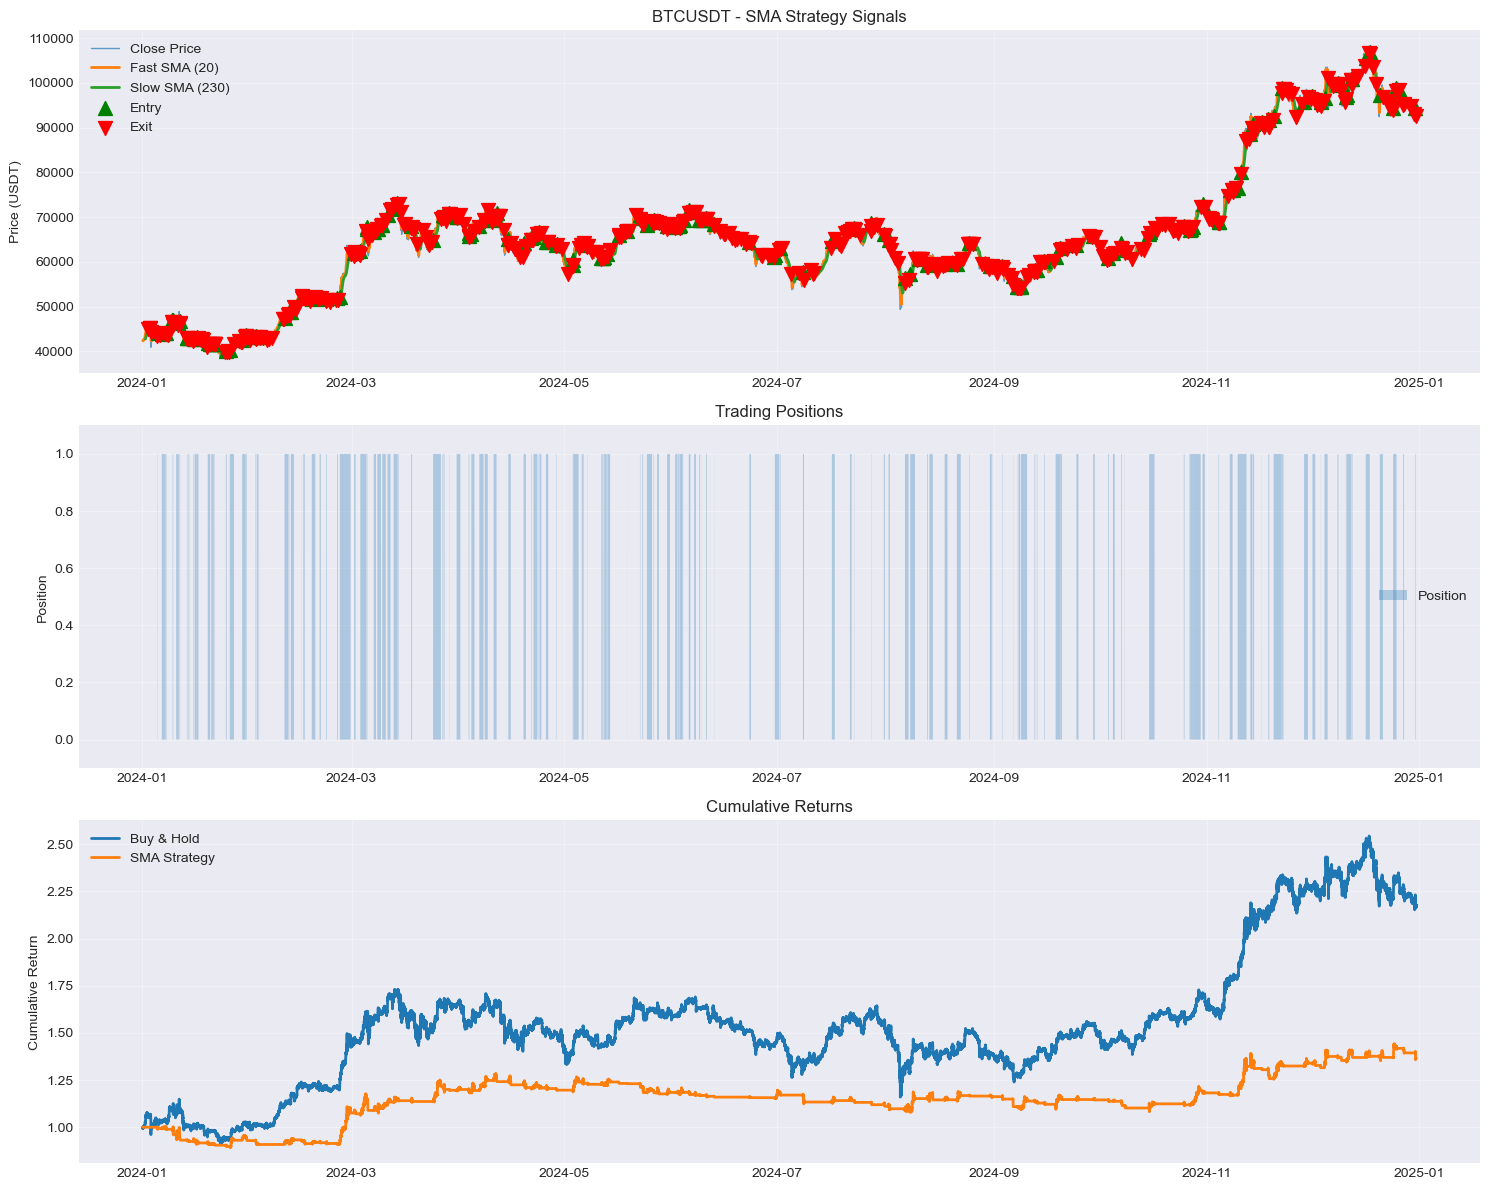

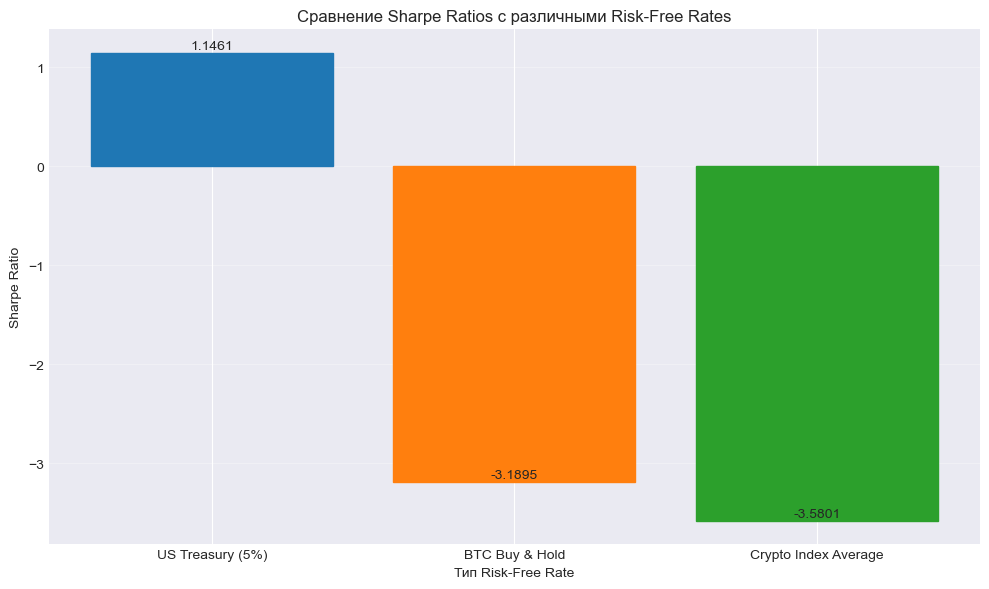

In [7]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# ==================== НАСТРОЙКИ ====================
# Стратегия
FAST_SMA = 20
SLOW_SMA = 230
SMA_LOOKBACK = 2  # Количество предыдущих свечей для проверки направления slow SMA

# Временные параметры
START_DATE = '2024-01-01'
END_DATE = '2024-12-31'
TIMEFRAME = '5m'

# Активы
SYMBOLS = ['BTCUSDT', 'SOLUSDT', 'ETHUSDT', 'ADAUSDT', 'BNBUSDT', 'XRPUSDT', 'DOGEUSDT']
MAIN_SYMBOL = 'BTCUSDT'  # Основной актив для стратегии

# Risk-free rates
TREASURY_RATE = 0.05  # 5% годовых

# Binance API
BASE_URL = 'https://api.binance.com/api/v3/klines'

# ==================== ФУНКЦИИ ====================

def get_binance_data(symbol, interval, start_date, end_date):
    """Загрузка данных с Binance"""
    start_ts = int(datetime.strptime(start_date, '%Y-%m-%d').timestamp() * 1000)
    end_ts = int(datetime.strptime(end_date, '%Y-%m-%d').timestamp() * 1000)
    
    all_data = []
    current_start = start_ts
    limit = 1000  # Максимум за один запрос
    
    # Создаем прогресс-бар
    total_requests = ((end_ts - start_ts) // (limit * 5 * 60 * 1000)) + 1
    pbar = tqdm(total=total_requests, desc=f'Загрузка {symbol}', unit='запрос')
    
    while current_start < end_ts:
        params = {
            'symbol': symbol,
            'interval': interval,
            'startTime': current_start,
            'endTime': end_ts,
            'limit': limit
        }
        
        try:
            response = requests.get(BASE_URL, params=params)
            data = response.json()
            
            if not data:
                break
                
            all_data.extend(data)
            current_start = data[-1][0] + 1
            pbar.update(1)
            
        except Exception as e:
            print(f"Ошибка при загрузке {symbol}: {e}")
            break
    
    pbar.close()
    
    # Преобразуем в DataFrame
    df = pd.DataFrame(all_data, columns=[
        'timestamp', 'open', 'high', 'low', 'close', 'volume',
        'close_time', 'quote_volume', 'trades', 'taker_buy_base',
        'taker_buy_quote', 'ignore'
    ])
    
    # Конвертируем типы данных
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['close'] = df['close'].astype(float)
    df['open'] = df['open'].astype(float)
    df['high'] = df['high'].astype(float)
    df['low'] = df['low'].astype(float)
    df['volume'] = df['volume'].astype(float)
    
    df.set_index('timestamp', inplace=True)
    
    return df

def calculate_sma_strategy(df, fast_period=20, slow_period=230, lookback=2):
    """Расчет стратегии SMA с дополнительным условием"""
    df = df.copy()
    
    # Расчет SMA
    df['sma_fast'] = df['close'].rolling(window=fast_period).mean()
    df['sma_slow'] = df['close'].rolling(window=slow_period).mean()
    
    # Проверка направления slow SMA
    df['slow_sma_diff'] = df['sma_slow'].diff()
    df['slow_sma_uptrend'] = True
    
    for i in range(1, lookback + 1):
        df['slow_sma_uptrend'] = df['slow_sma_uptrend'] & (df['slow_sma_diff'].shift(i) > 0)
    
    # Сигналы входа и выхода
    df['cross_up'] = (df['sma_fast'] > df['sma_slow']) & (df['sma_fast'].shift(1) <= df['sma_slow'].shift(1))
    df['cross_down'] = (df['sma_fast'] < df['sma_slow']) & (df['sma_fast'].shift(1) >= df['sma_slow'].shift(1))
    
    # Сигналы с учетом дополнительного условия
    df['entry_signal'] = df['cross_up'] & df['slow_sma_uptrend']
    df['exit_signal'] = df['cross_down']
    
    # Позиции
    df['position'] = 0
    in_position = False
    
    for i in range(len(df)):
        if df['entry_signal'].iloc[i] and not in_position:
            df.loc[df.index[i]:, 'position'] = 1
            in_position = True
        elif df['exit_signal'].iloc[i] and in_position:
            df.loc[df.index[i]:, 'position'] = 0
            in_position = False
    
    # Расчет доходности
    df['returns'] = df['close'].pct_change()
    df['strategy_returns'] = df['position'].shift(1) * df['returns']
    
    # Убираем NaN
    df['strategy_returns'].fillna(0, inplace=True)
    df['returns'].fillna(0, inplace=True)
    
    return df

def calculate_sharpe_ratio(returns, risk_free_rate, periods_per_year):
    """Расчет коэффициента Шарпа"""
    excess_returns = returns - risk_free_rate / periods_per_year
    
    if excess_returns.std() == 0:
        return 0
    
    sharpe = np.sqrt(periods_per_year) * excess_returns.mean() / excess_returns.std()
    return sharpe

def calculate_performance_metrics(returns, periods_per_year):
    """Расчет метрик производительности"""
    cumulative_returns = (1 + returns).cumprod()
    total_return = cumulative_returns.iloc[-1] - 1
    annualized_return = (1 + total_return) ** (periods_per_year / len(returns)) - 1
    annualized_volatility = returns.std() * np.sqrt(periods_per_year)
    
    # Максимальная просадка
    cummax = cumulative_returns.cummax()
    drawdown = (cumulative_returns - cummax) / cummax
    max_drawdown = drawdown.min()
    
    return {
        'total_return': total_return,
        'annualized_return': annualized_return,
        'annualized_volatility': annualized_volatility,
        'max_drawdown': max_drawdown
    }

def plot_strategy_results(df, symbol):
    """Визуализация результатов стратегии"""
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    # График цены и SMA
    ax1 = axes[0]
    ax1.plot(df.index, df['close'], label='Close Price', linewidth=1, alpha=0.7)
    ax1.plot(df.index, df['sma_fast'], label=f'Fast SMA ({FAST_SMA})', linewidth=2)
    ax1.plot(df.index, df['sma_slow'], label=f'Slow SMA ({SLOW_SMA})', linewidth=2)
    
    # Отметки входов и выходов
    entries = df[df['entry_signal']]
    exits = df[df['exit_signal']]
    ax1.scatter(entries.index, entries['close'], color='green', marker='^', s=100, label='Entry', zorder=5)
    ax1.scatter(exits.index, exits['close'], color='red', marker='v', s=100, label='Exit', zorder=5)
    
    ax1.set_title(f'{symbol} - SMA Strategy Signals')
    ax1.set_ylabel('Price (USDT)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # График позиций
    ax2 = axes[1]
    ax2.fill_between(df.index, 0, df['position'], alpha=0.3, label='Position')
    ax2.set_title('Trading Positions')
    ax2.set_ylabel('Position')
    ax2.set_ylim(-0.1, 1.1)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # График кумулятивной доходности
    ax3 = axes[2]
    cumulative_returns = (1 + df['returns']).cumprod()
    cumulative_strategy = (1 + df['strategy_returns']).cumprod()
    
    ax3.plot(df.index, cumulative_returns, label='Buy & Hold', linewidth=2)
    ax3.plot(df.index, cumulative_strategy, label='SMA Strategy', linewidth=2)
    ax3.set_title('Cumulative Returns')
    ax3.set_ylabel('Cumulative Return')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def main():
    print("=" * 60)
    print("РАСЧЕТ СТРАТЕГИИ SMA И КОЭФФИЦИЕНТОВ ШАРПА")
    print("=" * 60)
    
    # Периоды в году для 5-минутных данных
    periods_per_year = 365 * 24 * 12  # 252 торговых дня * 24 часа * 12 пятиминуток
    
    # 1. Загрузка данных для BTC
    print(f"\n1. Загрузка данных {MAIN_SYMBOL}")
    btc_data = get_binance_data(MAIN_SYMBOL, TIMEFRAME, START_DATE, END_DATE)
    
    # 2. Расчет стратегии SMA
    print(f"\n2. Расчет стратегии SMA для {MAIN_SYMBOL}")
    btc_strategy = calculate_sma_strategy(btc_data, FAST_SMA, SLOW_SMA, SMA_LOOKBACK)
    
    # Метрики стратегии
    strategy_metrics = calculate_performance_metrics(btc_strategy['strategy_returns'], periods_per_year)
    buyhold_metrics = calculate_performance_metrics(btc_strategy['returns'], periods_per_year)
    
    print(f"\n--- Результаты стратегии {MAIN_SYMBOL} ---")
    print(f"Общая доходность стратегии: {strategy_metrics['total_return']:.2%}")
    print(f"Годовая доходность стратегии: {strategy_metrics['annualized_return']:.2%}")
    print(f"Годовая волатильность стратегии: {strategy_metrics['annualized_volatility']:.2%}")
    print(f"Максимальная просадка стратегии: {strategy_metrics['max_drawdown']:.2%}")
    print(f"\nОбщая доходность Buy & Hold: {buyhold_metrics['total_return']:.2%}")
    print(f"Годовая доходность Buy & Hold: {buyhold_metrics['annualized_return']:.2%}")
    
    # 3. Sharpe Ratio с казначейскими облигациями (5%)
    sharpe_treasury = calculate_sharpe_ratio(
        btc_strategy['strategy_returns'], 
        TREASURY_RATE, 
        periods_per_year
    )
    
    print(f"\n3. Sharpe Ratio (risk-free = {TREASURY_RATE:.1%} Treasury):")
    print(f"   Sharpe Ratio стратегии: {sharpe_treasury:.4f}")
    
    # 4. Sharpe Ratio с BTC Buy & Hold как бенчмарк
    btc_annual_return = buyhold_metrics['annualized_return']
    sharpe_btc_benchmark = calculate_sharpe_ratio(
        btc_strategy['strategy_returns'], 
        btc_annual_return, 
        periods_per_year
    )
    
    print(f"\n4. Sharpe Ratio (risk-free = BTC Buy & Hold {btc_annual_return:.2%}):")
    print(f"   Sharpe Ratio стратегии: {sharpe_btc_benchmark:.4f}")
    
    # 5. Загрузка данных для всех криптовалют и расчет средней доходности
    print(f"\n5. Загрузка данных для криптовалют: {', '.join(SYMBOLS)}")
    
    crypto_returns = {}
    for symbol in SYMBOLS:
        print(f"\nЗагрузка {symbol}...")
        data = get_binance_data(symbol, TIMEFRAME, START_DATE, END_DATE)
        returns = data['close'].pct_change().fillna(0)
        metrics = calculate_performance_metrics(returns, periods_per_year)
        crypto_returns[symbol] = metrics['annualized_return']
        print(f"{symbol}: Годовая доходность = {metrics['annualized_return']:.2%}")
    
    # Средняя доходность криптовалют
    avg_crypto_return = np.mean(list(crypto_returns.values()))
    print(f"\nСредняя годовая доходность криптовалют: {avg_crypto_return:.2%}")
    
    # Sharpe Ratio со средней доходностью крипторынка
    sharpe_crypto_index = calculate_sharpe_ratio(
        btc_strategy['strategy_returns'], 
        avg_crypto_return, 
        periods_per_year
    )
    
    print(f"\n6. Sharpe Ratio (risk-free = Crypto Index {avg_crypto_return:.2%}):")
    print(f"   Sharpe Ratio стратегии: {sharpe_crypto_index:.4f}")
    
    # Итоговая таблица
    print("\n" + "=" * 60)
    print("ИТОГОВАЯ ТАБЛИЦА SHARPE RATIOS")
    print("=" * 60)
    
    results_df = pd.DataFrame({
        'Risk-Free Rate Type': ['US Treasury (5%)', 'BTC Buy & Hold', 'Crypto Index Average'],
        'Risk-Free Rate': [f"{TREASURY_RATE:.1%}", f"{btc_annual_return:.2%}", f"{avg_crypto_return:.2%}"],
        'Sharpe Ratio': [sharpe_treasury, sharpe_btc_benchmark, sharpe_crypto_index]
    })
    
    print(results_df.to_string(index=False))
    
    # Визуализация
    plot_strategy_results(btc_strategy, MAIN_SYMBOL)
    
    # График сравнения Sharpe Ratios
    plt.figure(figsize=(10, 6))
    bars = plt.bar(results_df['Risk-Free Rate Type'], results_df['Sharpe Ratio'])
    
    # Раскрашиваем столбцы
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    plt.title('Сравнение Sharpe Ratios с различными Risk-Free Rates')
    plt.ylabel('Sharpe Ratio')
    plt.xlabel('Тип Risk-Free Rate')
    
    # Добавляем значения на столбцы
    for i, (bar, value) in enumerate(zip(bars, results_df['Sharpe Ratio'])):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.4f}', ha='center', va='bottom')
    
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()